In [ ]:
# Cargar librerias necesarias
from google.colab import drive
drive.mount('content/')
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


# Extract

In [ ]:
# Dataset sales_predictions.csv
df = pd.read_csv('/content/content/MyDrive/Data Science Bootcamp Talendig/sales_predictions_2023.csv')
# Extraer datos al dataFrame
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
# Identificar datos atipicos, valos nulos, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df.describe(include='all')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


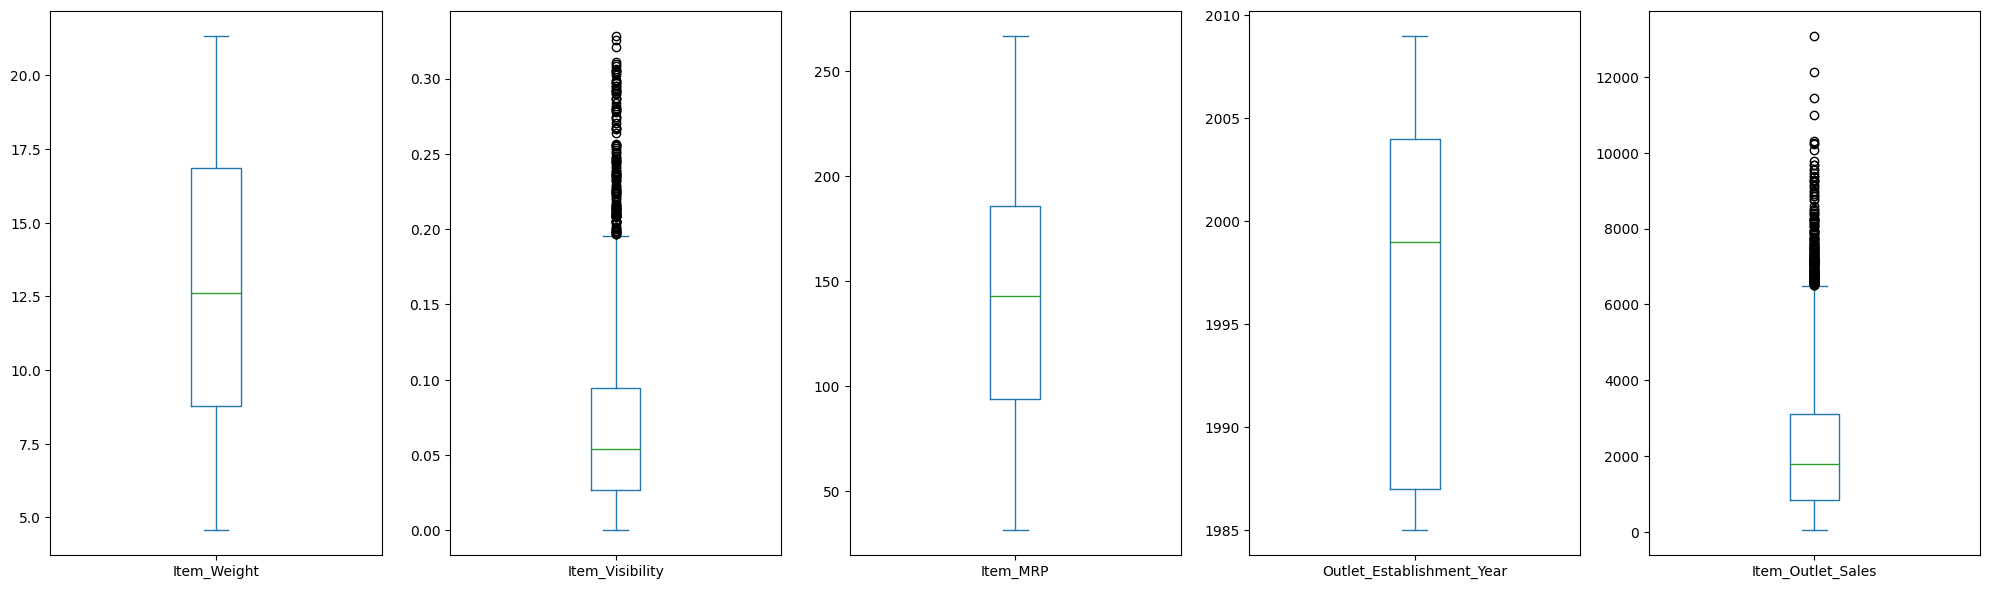

In [ ]:
df.plot(kind='box', subplots=True, figsize=(20, 6))
plt.tight_layout()
plt.show()

Aqui podemos ver como las columnas de item_visibility y item_outlet_sales tienen una gran cantidad de outliers (valores atipicos)

In [ ]:
# Porcentaje de Nulos por Columna
(df.isnull().sum() / len(df)) * 100

Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64

In [ ]:
# Idenfique valores duplicados
filas_duplicadas = df.duplicated()

print('Filas Duplicadas: \n', filas_duplicadas.value_counts())

Filas Duplicadas: 
 False    8523
Name: count, dtype: int64


# Transform

Crear una funcion para la imputacion de datos faltantes con el valor que usted considere.


Nota:

*   Ubique una columna que sirva como identificador y lo pueda ayudar a eemplazar los valores nulos.  Explique su eleccion.
*   Item_Visibility: Esta columnas no puede tener valores en 0, ya que cuando un producto es vendido su valor no debe ser 0.
*   Item_Weight: no debe tener valores en 0.
*   Outlet_Size : no debe tener valores en 0.

Recuerden que pueden usar boxplot para identificar valores numericos atipicos en una columna.


In [ ]:
print(df['Outlet_Size'].value_counts(), '\n')

print(df['Outlet_Size'].mode())

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64 

0    Medium
Name: Outlet_Size, dtype: object


In [ ]:
# Moda outlet size (valor mas repetido)
mode_size = df['Outlet_Size'].mode().iloc[0]

df['Outlet_Size'].fillna(mode_size, inplace=True)

df['Outlet_Size'].isnull().sum()

0

In [ ]:
visibility_sum = df['Item_Visibility'].sum()
visibility_median = df['Item_Visibility'].median()
visibility_mean = df['Item_Visibility'].mean()

print('Suma:', visibility_sum)
print('Mediano:', visibility_median)
print('Average:', visibility_mean)
print('\n Value Counts (0): \n', df['Item_Visibility'].value_counts().iloc[0])

Suma: 563.6432812830001
Mediano: 0.053930934
Average: 0.06613202877895108

 Value Counts (0): 
 526


In [ ]:
df['Item_Visibility'] = np.where(df['Item_Visibility'] == 0, visibility_median, df['Item_Visibility'])

df['Item_Visibility'].value_counts()

Item_Visibility
0.053931    527
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7879, dtype: int64

In [ ]:
# Contando numero de outliers en columna 'Item_Visibility'
q1 = df['Item_Visibility'].quantile(0.25)
q3 = df['Item_Visibility'].quantile(0.75)

IQR = q3 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

outlier_count = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)].shape

outlier_df = df[(df['Item_Visibility'] < lower_bound) | (df['Item_Visibility'] > upper_bound)]

print(outlier_count)

(173, 26)


In [ ]:
weight_avg = df['Item_Weight'].mean()
num_na = df['Item_Weight'].isnull().sum()

print(weight_avg, '//', num_na)

12.857645184135976 // 1463


In [ ]:
df['Item_Weight'].fillna(weight_avg, inplace=True)

print(df['Item_Weight'].isnull().sum())
df['Item_Weight'].value_counts()

0


Item_Weight
12.857645    1463
12.150000      86
17.600000      82
13.650000      77
11.800000      76
             ... 
7.275000        2
7.685000        1
9.420000        1
6.520000        1
5.400000        1
Name: count, Length: 416, dtype: int64

In [ ]:
# Crear una funcion para normalizar los datos, por ejemplo:
# En la columna Item_Fat_Content el valor "LF" es igual a Low Fat, se debe homologar a "Low Fat"

df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['low fat', 'LF'], 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(['reg'], 'Regular')

df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

# Load

In [ ]:
# Cargue los datos en un archivo .csv
df.to_csv('/content/content/MyDrive/Data Science Bootcamp Talendig/Procesado_Sales_Predictions_2023.csv', index=False)

# Desarrollo

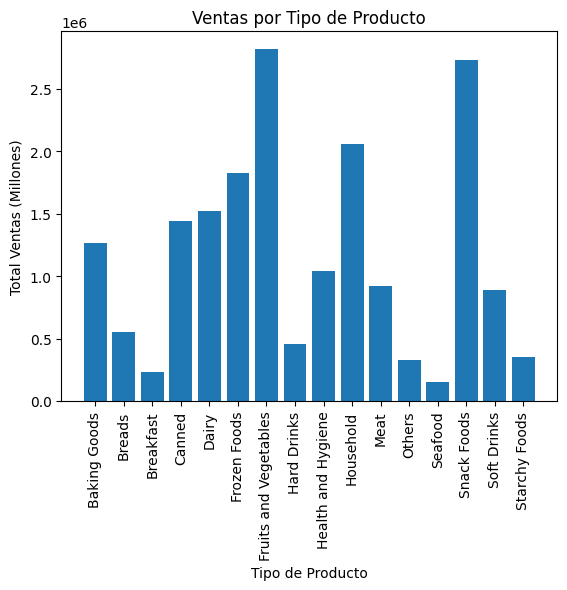

In [ ]:
# Haga un analisis de sus datos y grafique con los graficos que entienda sea mas factible para tu analisis y explique en texto el resultado de sus graficas. (Minimo 4 graficas)
item_sales = df.groupby('Item_Type')['Item_Outlet_Sales'].sum()

plt.bar(item_sales.index, item_sales.values)
plt.xlabel('Tipo de Producto')
plt.ylabel('Total Ventas (Millones)')
plt.title('Ventas por Tipo de Producto')
plt.xticks(rotation=90)
plt.show()

En el grafico, podemos ver que los productos con mas ventas totales son "frutas y vegetales" y "Snack Foods", tambien podemos ver que "Breakfast", "Seafood", y "Others" son el tipo de producto con menos ventas totales

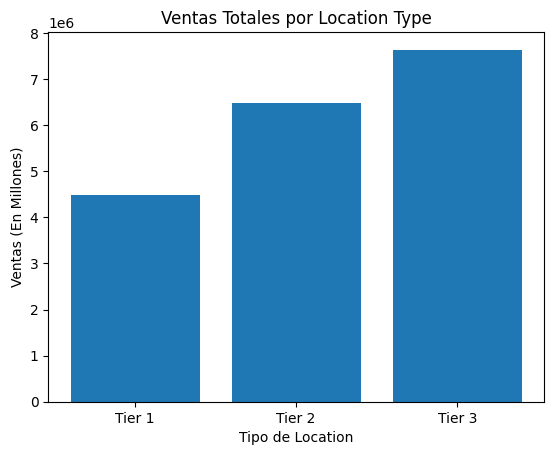

In [ ]:
TS_perLocationType = df.groupby('Outlet_Location_Type')['Item_Outlet_Sales'].sum()

plt.bar(TS_perLocationType.index, TS_perLocationType.values)
plt.xlabel('Tipo de Location')
plt.ylabel('Ventas (En Millones)')
plt.title('Ventas Totales por Location Type')
plt.show()

Aqui vemos que el location type tier 3 es el que mas ventas totales tienes (cerca de 8 millones), el tier 2 tiene al rededor de 6.5 millones y el tier 1 cerca de 4.5 millones.

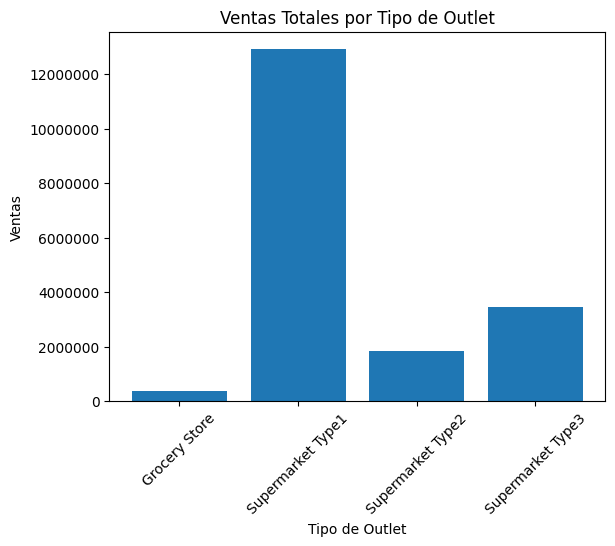

In [ ]:
import matplotlib.ticker as mticker

formatter = mticker.FormatStrFormatter('%.0f')  # Float sin decimales
plt.gca().yaxis.set_major_formatter(formatter)  # Aplicar formato en el axis Y

TS_perType = df.groupby('Outlet_Type')['Item_Outlet_Sales'].sum()

plt.bar(TS_perType.index, TS_perType.values)
plt.xlabel('Tipo de Outlet')
plt.ylabel('Ventas')
plt.title('Ventas Totales por Tipo de Outlet')
plt.xticks(rotation=45)
plt.show()

El supermarket type 1 es el tipo de outlet con mas ventas, tiene mas de 12 millones en ventas totales y el segundo con mas ventas es el supermarket type 3 con 4 millones. Podemos ver que la diferencia es muy grande, y que la mayoria de las ventas provienen de este tipo de outlet.

# Aprendizaje supervisado - Regression Model

BigMart Sales Prediction practice problem

**Dataset dictionary**:

El objetivo de este ejercicio es predecir el precio de venta de cada Item, para entender que tambien el modelo se ha entrenado recuerde usar las metricas aprendidas en clases pasadas.


Item_Identifier: Unique product ID


Item_Weight: Weight of product


Item_Fat_Content: Whether the product is low fat or not


Item_Visibility: The % of total display area of all products in a store allocated to the particular product


Item_Type: The category to which the product belongs


Item_MRP: Maximum Retail Price (list price) of the product


Outlet_Identifier: Unique store ID


Outlet_Establishment_Year: The year in which store was established


Outlet_Size: The size of the store in terms of ground area covered


Outlet_Location_Type: The type of city in which the store is located


Outlet_Type: Whether the outlet is just a grocery store or some sort of
supermarket


Item_Outlet_Sales: Sales of the product in the particulat store. This is the
outcome variable to be predicted.

**Utilize el modelo de regresion de su eleccion.**

In [ ]:
# Haga las transformaciones en las columnas que lo requiera
# Su columna objetivo sera Item_Outlet_Sales
df['Item_Fat_Content'].value_counts() # Low Fat, Regular
df['Outlet_Size'].value_counts() # Small, Medium, High
df['Outlet_Location_Type'].value_counts() # Tier 1, 2, 3
df['Outlet_Type'].value_counts() # Supermarket Type 1, 2, 3, Grocery Store
df['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Item_Type'])

In [ ]:
df.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Fat_Content                    object
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Outlet_Size                         object
Outlet_Location_Type                object
Outlet_Type                         object
Item_Outlet_Sales                  float64
Item_Type_Baking Goods                bool
Item_Type_Breads                      bool
Item_Type_Breakfast                   bool
Item_Type_Canned                      bool
Item_Type_Dairy                       bool
Item_Type_Frozen Foods                bool
Item_Type_Fruits and Vegetables       bool
Item_Type_Hard Drinks                 bool
Item_Type_Health and Hygiene          bool
Item_Type_Household                   bool
Item_Type_Meat                        bool
Item_Type_Others                      bool
Item_Type_S

In [ ]:
df['Item_Type_Baking Goods'] = df['Item_Type_Baking Goods'].astype(int)

In [ ]:
df['Item_Type_Baking Goods'].head(10)

0    0
1    0
2    0
3    0
4    0
5    1
6    0
7    0
8    0
9    0
Name: Item_Type_Baking Goods, dtype: int64

In [ ]:
var_list = ['Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned',
           'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables',
           'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household',
           'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
           'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods']

for var in var_list:
  df[var] = df[var].astype(int)

In [ ]:
df.dtypes

Item_Identifier                     object
Item_Weight                        float64
Item_Fat_Content                    object
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Identifier                   object
Outlet_Establishment_Year            int64
Outlet_Size                         object
Outlet_Location_Type                object
Outlet_Type                         object
Item_Outlet_Sales                  float64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_S

In [ ]:
df.drop(columns='Item_Type_Others', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Identifier                  8523 non-null   object 
 1   Item_Weight                      8523 non-null   float64
 2   Item_Fat_Content                 8523 non-null   object 
 3   Item_Visibility                  8523 non-null   float64
 4   Item_MRP                         8523 non-null   float64
 5   Outlet_Identifier                8523 non-null   object 
 6   Outlet_Establishment_Year        8523 non-null   int64  
 7   Outlet_Size                      8523 non-null   object 
 8   Outlet_Location_Type             8523 non-null   object 
 9   Outlet_Type                      8523 non-null   object 
 10  Item_Outlet_Sales                8523 non-null   float64
 11  Item_Type_Baking Goods           8523 non-null   int64  
 12  Item_Type_Breads    

In [ ]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'Low Fat': 1, 'Regular': 0})
df['Outlet_Size'] = df['Outlet_Size'].replace({'Small': 0, 'Medium': 1, 'High': 2})
df['Outlet_Location_Type'] = df['Outlet_Size'].replace({'Tier 1': 0, 'Tier 2': 1, 'Tier 3': 2})
df['Outlet_Type'] = df['Outlet_Size'].replace({'Grocery Store': 0, 'Supermarket Type1': 1, 'Supermarket Type2 ': 2, 'Supermarket Type3': 3})

df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,...,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,FDA15,9.300000,1,0.016047,249.8092,OUT049,1999,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,DRC01,5.920000,0,0.019278,48.2692,OUT018,2009,1,1,1,...,0,0,0,0,0,0,0,0,1,0
2,FDN15,17.500000,1,0.016760,141.6180,OUT049,1999,1,1,1,...,0,0,0,0,0,1,0,0,0,0
3,FDX07,19.200000,0,0.053931,182.0950,OUT010,1998,1,1,1,...,0,1,0,0,0,0,0,0,0,0
4,NCD19,8.930000,1,0.053931,53.8614,OUT013,1987,2,2,2,...,0,0,0,0,1,0,0,0,0,0
5,FDP36,10.395000,0,0.053931,51.4008,OUT018,2009,1,1,1,...,0,0,0,0,0,0,0,0,0,0
6,FDO10,13.650000,0,0.012741,57.6588,OUT013,1987,2,2,2,...,0,0,0,0,0,0,0,1,0,0
7,FDP10,12.857645,1,0.127470,107.7622,OUT027,1985,1,1,1,...,0,0,0,0,0,0,0,1,0,0
8,FDH17,16.200000,0,0.016687,96.9726,OUT045,2002,1,1,1,...,1,0,0,0,0,0,0,0,0,0
9,FDU28,19.200000,0,0.094450,187.8214,OUT017,2007,1,1,1,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
df['Item_Identifier'].describe()

count      8523
unique     1559
top       FDW13
freq         10
Name: Item_Identifier, dtype: object

In [ ]:
# Divida la data de prueba y entrenamiento

X = df.drop(columns=['Item_Outlet_Sales', 'Item_Identifier', 'Outlet_Identifier'], axis=1)
y = df['Item_Outlet_Sales']

X.columns = [None] * len(X.columns)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresion Lineal

In [ ]:
# Instancia el modelo y ajunte los datos de entrenamiento
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

rlm = LinearRegression()

pipe_regression = make_pipeline(rlm)

pipe_regression.fit(X_train,y_train)

Pipeline(steps=[('linearregression', LinearRegression())])

In [ ]:
# Verifique las metricas para validar que tambien esta prediciendo el modelo
train_score = pipe_regression.score(X_train,y_train)
print("Score modelo de regresion para el conjunto de entrenamiento:", train_score)
test_score = pipe_regression.score(X_test,y_test)
print("Score modelo de regresion para el conjunto de prueba:", test_score)

y_pred = pipe_regression.predict(X_test)
print("Prediccion para el conjunto de prueba:",y_pred)

# R^2:
r2_train = r2_score(y_test, y_pred)
print(f"Coeficiente de Determinación (R^2): {r2_train}")

# Error absoluto medio:
eam = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (EAM): {np.round(eam,2) }")

# Error cuadrático medio:
mse_test = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático Medio (ECM): {np.round(mse_test,2) }")

Score modelo de regresion para el conjunto de entrenamiento: 0.32552100036218645
Score modelo de regresion para el conjunto de prueba: 0.27948953347820205
Prediccion para el conjunto de prueba: [ 2.94087691e-01  2.36547959e-01  1.52989672e-01  2.18423075e-01
  4.91902860e-01  4.16700512e-01 -2.32018425e-01  4.27208270e-01
  5.44046165e-01  7.13868939e-01  2.99245170e-01  8.85623644e-01
  3.96515416e-01  3.26032498e-01  6.38105592e-02  3.94880152e-01
  1.45977551e-01  4.75390524e-02  6.99487437e-01  5.43055056e-01
  2.58152751e-01  5.27921505e-02  4.76740511e-01  9.71602700e-02
  5.20836204e-01  8.73361338e-01  1.54483583e-01 -8.28325917e-02
  2.90046838e-01  1.28678397e-01  8.86095287e-01  8.15669716e-01
  7.31587733e-01  6.41787449e-01  5.50677371e-01  6.37604283e-01
  1.05813963e+00  2.79992038e-01  4.89205653e-01  5.08194938e-01
  3.48903928e-02  5.53221356e-01  5.12674802e-01  3.63118972e-01
 -1.01299930e-01  5.15973100e-01  5.40067410e-01  2.52366137e-01
  3.84414467e-01  1.014222

In [ ]:
eam = mean_absolute_error(y_test, y_pred)
print(f"Error Absoluto Medio (EAM): {np.round(eam,2) }")
mse_train = mean_squared_error(y_test, y_pred)
print(f"Error cuadrático Medio (ECM): {np.round(mse_train,2) }")
# Raíz del error cuadrático medio (RECM):
rmse_train = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Raíz del error cuadrático medio  (RECM) : {rmse_train }")

Error Absoluto Medio (EAM): 0.34
Error cuadrático Medio (ECM): 0.17
Raíz del error cuadrático medio  (RECM) : 0.40672265906304106


# Decision Tree Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor(max_depth=7)  # Set the maximum depth of the tree (optional)

# Train the model on the training data
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=7)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [ ]:
y_pred_train_DT = model.predict(X_train)
y_pred_DT = model.predict(X_test)

# MAPE
mape_train_DT = mean_absolute_percentage_error(y_train, y_pred_train_DT)
mape_test_DT = mean_absolute_percentage_error(y_test, y_pred_DT)

# R^2
r2_train = r2_score(y_test, y_pred_DT)
print(f"Coeficiente de Determinación (R^2) (Testing Set): {r2_train}")

# EAM
eam_testing_DT = mean_absolute_error(y_test, y_pred_DT)
eam_train_DT = mean_absolute_error(y_train, y_pred_train_DT)
print(f"\nError Absoluto Medio (Testing Set): {np.round(eam_testing_DT,2) }")
print(f"Error Absoluto Medio (Training Set): {np.round(eam_train_DT,2) }")

# MSE
rmse_train = np.sqrt(mean_squared_error(y_test, y_pred_DT))
print(f"Raíz del error cuadrático medio  (RECM) : {rmse_train }")

# MAPE
print(f"\nMAPE (Testing Set): {mape_train_DT:.2f}")
print(f"MAPE (Training): {mape_test_DT:.2f}")

Coeficiente de Determinación (R^2) (Testing Set): 0.2109160599369504

Error Absoluto Medio (Testing Set): 0.26
Error Absoluto Medio (Training Set): 0.14
Raíz del error cuadrático medio  (RECM) : 0.4256374409481908

MAPE (Testing Set): 326022246767152.25
MAPE (Training): 654087348101200.50


# Conclusiones Modelo Regresion

Arriba corrimos dos modelos de regresion con el proposito de encontrar cual de los dos nos da un modelo mas preciso a la hora de predecir "Item_Outlet_Sales".
Estos son los resultados del modelo de regresion lineal:

*   Error Absoluto Medio: 0.34

El decision tree tuvo los siguientes resultados:

*   Error Absoluto Medio: 0.14

En base a esta medida del error, podemos concluir que el Decision Tree Regressor es mas preciso a la hora de predecir item outlet sales en nuestra data.


# Modelo de Clasificacion

About the Dataset


Pregnancies :- Number of times a woman has been pregnant


Glucose :- Plasma Glucose concentration of 2 hours in an oral glucose tolerance test


BloodPressure :- Diastollic Blood Pressure (mm hg)


SkinThickness :- Triceps skin fold thickness(mm)


Insulin :- 2 hour serum insulin(mu U/ml)


BMI :- Body Mass Index ((weight in kg/height in m)^2)


Age :- Age(years)


DiabetesPedigreeFunction :-scores likelihood of diabetes based on family history)


Outcome :- 0(doesn't have diabetes) or 1 (has diabetes)

ETL PROCESS

In [ ]:
# Extraer la data, dataset diabetes.csv
diabetes_df = pd.read_csv('/content/content/MyDrive/Data Science Bootcamp Talendig/diabetes.csv')

In [ ]:
# Explore y entienda su dataset con los diferentes metodos de Pandas
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Identifique valores, duplicados, nulos, etc.
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
diabetes_df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


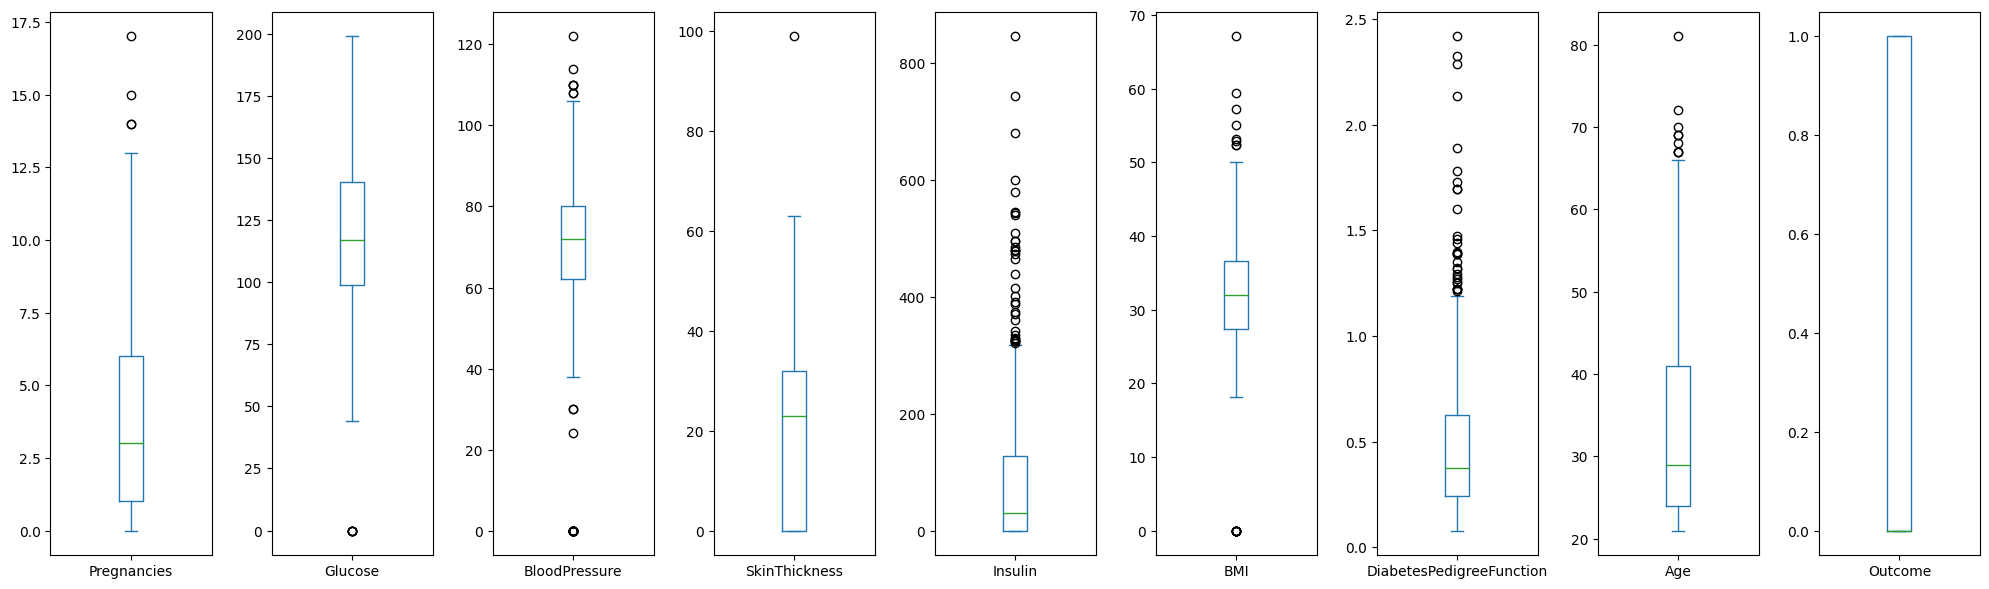

In [ ]:
diabetes_df.plot(kind='box', subplots=True, figsize=(20, 6))
plt.tight_layout()
plt.show()

En estos box plots podemos ver que la columna de insulina y diabetesPedigreeFunction tienen muchos outliers. Las columnas de BMI y BloodPressure tienen tambien outliers, pero menos que las columnas mencionadas anteriormente. SkinThickness y Pregnancies, tienen pocos outliers. Estos datos hay que analizarlos para asegurarnos que sean valores reales, y no traigan mucho ruido a la data.

In [ ]:
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
  cuenta = diabetes_df[col].value_counts()[0]
  print('Cantidad de 0s en columna ', col + ': ', cuenta)

Cantidad de 0s en columna  Glucose:  5
Cantidad de 0s en columna  BloodPressure:  35
Cantidad de 0s en columna  SkinThickness:  227
Cantidad de 0s en columna  Insulin:  374
Cantidad de 0s en columna  BMI:  11


In [ ]:
import seaborn as sns
correlation_matrix = diabetes_df.corr()

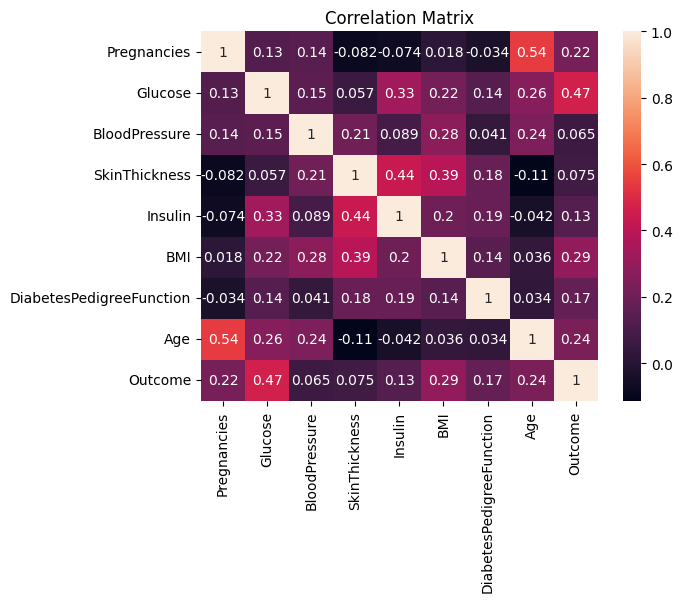

In [ ]:
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix')
plt.show()

En el heatmap podemos ver que insulina y glucosa tienen una correlacion de 0.33, BMI y skinThickness tambien de 0.39, Insulina y SkinThickness de 0.44, Glucosa y Outcome de 0.47, y Edad Y Pregnancies de 0.54.

En estas columnas podemos ver una correlacion positiva y relativamente fuerte lo cual nos indica que hay una relacion lineal entre esas caracteristicas.

In [ ]:
# Elimine las columnas que no aporten valor a nuestro analisis
noskin_df = diabetes_df.drop(columns='SkinThickness')

In [ ]:
noskin_df.head()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,0,33.6,0.627,50,1
1,1,85,66,0,26.6,0.351,31,0
2,8,183,64,0,23.3,0.672,32,1
3,1,89,66,94,28.1,0.167,21,0
4,0,137,40,168,43.1,2.288,33,1


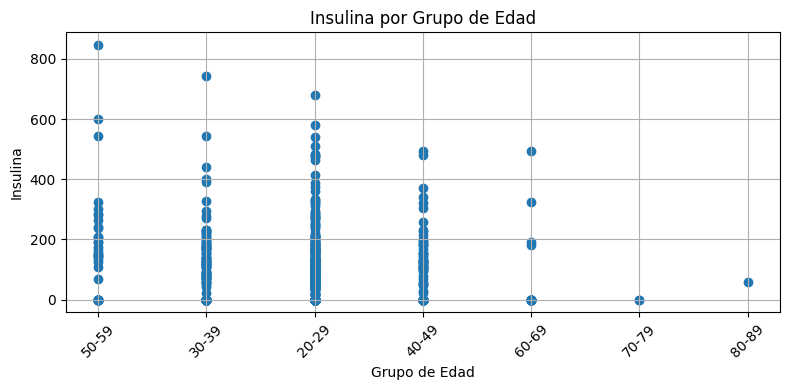

In [ ]:
age_groups = range(20,91,10)
diabetes_df['Age_Group'] = pd.cut(diabetes_df['Age'], bins=age_groups, right=False, labels=[f'{i}-{i+9}' for i in age_groups[:-1]])

plt.figure(figsize=(8, 4))
plt.scatter(diabetes_df['Age_Group'], diabetes_df['Insulin'])

plt.xlabel('Grupo de Edad')
plt.ylabel('Insulina')
plt.title('Insulina por Grupo de Edad')

plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Aqui vemos que en los rangos de edades 50-59, 30-39, 20-29, 40-49, y 60-69 estan al rededor de los mismos valores con insulina. En el valor que tenemos en 70-79 y 80-89 podemos ver que el valor de insulina estan bajitos. En base a esto podemos decir que no vemos una relacion entre insulina y edad.

In [ ]:
# Haga las imputaciones de lugar en las columnas que lo requieran, utilice el metodo estadistico que mas convenga
insulin_ave = diabetes_df['Insulin'].median()
diabetes_df['Insulin'].replace({0: insulin_ave}, inplace=True)

In [ ]:
def replace_mediano(col):
  mediano = diabetes_df[col].median()
  diabetes_df[col].replace({0: mediano}, inplace = True)

In [ ]:
replace_mediano('Glucose')
replace_mediano('BloodPressure')
replace_mediano('BMI')
replace_mediano('SkinThickness')

In [ ]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Haga visualizaciones de la data incluyendo heatmap para ver la relacion de las caracteristicas del dataset

In [ ]:
# Identifique los valores atipicos (Outlier)
# ¿Qué es un valor atípico?
# Un valor atípico es un punto de datos en un conjunto de datos que está distante de todas las demás observaciones.

In [ ]:
def replace_mediano2(col):
  mediano = noskin_df[col].median()
  noskin_df[col].replace({0: mediano}, inplace = True)

In [ ]:
replace_mediano2('Glucose')
replace_mediano2('BloodPressure')
replace_mediano2('BMI')
replace_mediano2('Insulin')

In [ ]:
noskin_df.describe()

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Decision Tree

In [ ]:
X = noskin_df.drop(columns='Outcome')
y = noskin_df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)

In [ ]:
dtc = DecisionTreeClassifier()

classification_pipe = make_pipeline(dtc)

classification_pipe.fit(X_train, y_train)

Pipeline(steps=[('decisiontreeclassifier', DecisionTreeClassifier())])

In [ ]:
y_pred_test = classification_pipe.predict(X_test)
y_pred_train = classification_pipe.predict(X_train)

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)
accuracy_training = accuracy_score(y_train, y_pred_train)
print(f"Decision Tree Model Accuracy: {accuracy:.4f}")
print(f"\nDecision Tree Accuracy (Training): {accuracy_training:.4f}")

Decision Tree Model Accuracy: 0.7468

Decision Tree Accuracy (Training): 1.0000


# Modelo SVM

In [ ]:
X = noskin_df.drop(columns='Outcome')
y = noskin_df.Outcome

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20, random_state=42)

In [ ]:
from sklearn.svm import SVC

In [ ]:
clf = SVC(kernel='poly', degree = 4)

clf.fit(X_train, y_train)

SVC(degree=4, kernel='poly')

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_training = clf.predict(X_train)

accuracy = accuracy_score(y_test, y_pred_test)
accuracy_training = accuracy_score(y_train, y_pred_training)
print(f"SVM Model Accuracy: {accuracy:.4f}")
print(f"\nSVM Model Accuracy (Training): {accuracy_training:.4f}")

SVM Model Accuracy: 0.7662

SVM Model Accuracy (Training): 0.7704


# Conclusiones

En este modelo de clasificacion, comparamos un modelo de Decision Tree y de SVM (Support Vector Machine) para ver cual genera mejores resultados:



*   Decision Tree Model Accuracy: 0.7468
*   SVM Model Accuracy: 0.7662

Como vemos, el modelo SVM tuvo un 76.62% de precision, y fue ligeramente mejor que el Decision Tree por 1.94%.

